In [22]:
import pandas as pd
import numpy as np

In [16]:
returns = pd.read_csv('ret.csv',index_col=0)
returns.columns=['returns']
returns.index.name = 'trade_date'

share = pd.read_csv('share.csv',index_col=0)
share.columns=['share']
share.index.name = 'trade_date'

In [32]:
fill_share = share.unstack().replace(0, np.nan).fillna(method='ffill').unstack().T
fill_share

/tmp/ipykernel_201157/126570213.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fill_share = share.unstack().replace(0, np.nan).fillna(method='ffill').unstack().T


Index(['share'], dtype='object')

In [36]:
total_data1 = pd.concat([returns, fill_share], axis=1)
total_data0 = pd.concat([returns, share], axis=1)

<Axes: title={'center': 'returns'}, xlabel='trade_date'>

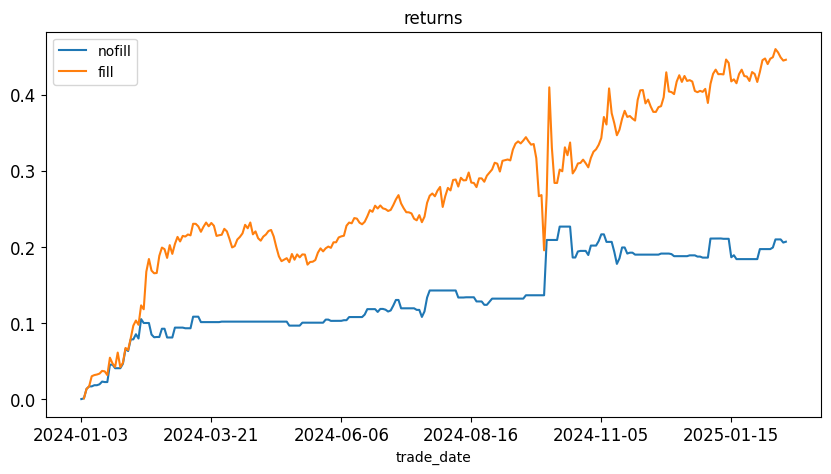

In [52]:
total_data0['ret1'] = total_data0['returns'].values * total_data0['share'].values
total_data1['ret1'] = total_data1['returns'].values * total_data1['share'].values
s0 = total_data0['ret1']
s0.name = 'nofill'
s1 = total_data1['ret1']
s1.name = 'fill'
pd.concat([s0, s1], axis=1).cumsum().plot(title='returns', figsize=(10, 5), fontsize=12)

<Axes: title={'center': 'long_returns'}, xlabel='trade_date'>

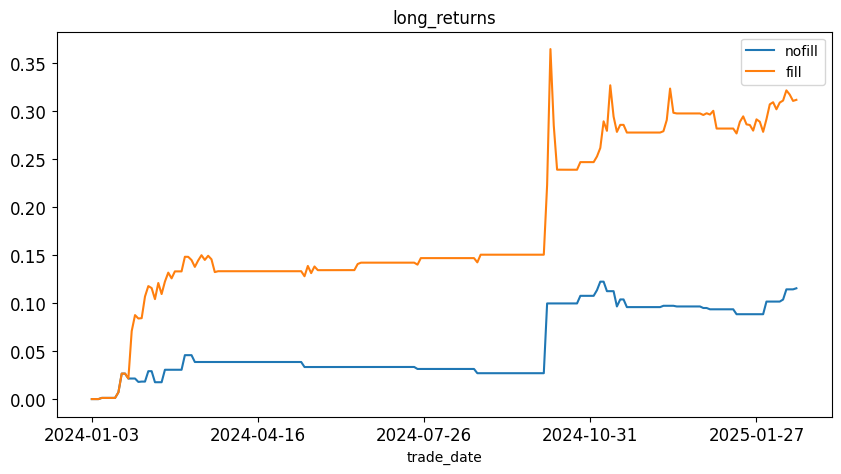

In [63]:
td1 = total_data1[total_data1['share']!=-1.0]['ret1']
td0 = total_data0[total_data0['share']!=-1.0]['ret1']

td0.name = 'nofill'
td1.name = 'fill'

pd.concat([td0, td1], axis=1).fillna(0).cumsum().plot(title='long_returns', figsize=(10, 5), fontsize=12)